<a href="https://colab.research.google.com/github/muhammadficki/DataMining/blob/main/Prediksi_Harga_Mobil_Bekas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip matplotlib

ERROR: unknown command "matplotlib"


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# **1. Data Understanding**

In [ ]:
# cek merk mobilnya apa saja dari atribut model
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [ ]:
df.info()
#Pakai Algoritma multiple linier regression
#syaratnya harus pakai type data int/angka
#utk type data yg masih object, float kita lakukan label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
# cek baris & kolom
df.shape
# Disini ada 6738 data & 9 atribut

(6738, 9)

# **2. Cleaning Data**

In [ ]:
# Apakah ada data yg bernilai kosong?
df.isnull().sum()
# Hasilnya tdk ada nilai kosong, lanjut next step

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
# Apakah ada nilai yg duplicate?
df.duplicated().sum()
# Hasilnya ada 39 data yg sama, kita harus menghapus data/nilai yg sama

39

In [ ]:
# Hapus data duplicate
df = df.drop_duplicates()

In [ ]:
# cek baris & kolom setelah di cleaning
df.shape
# Hasilnya ada 6699 data & 9 atribut

(6699, 9)

# **3. Exploratory Data Analysis (EDA)**

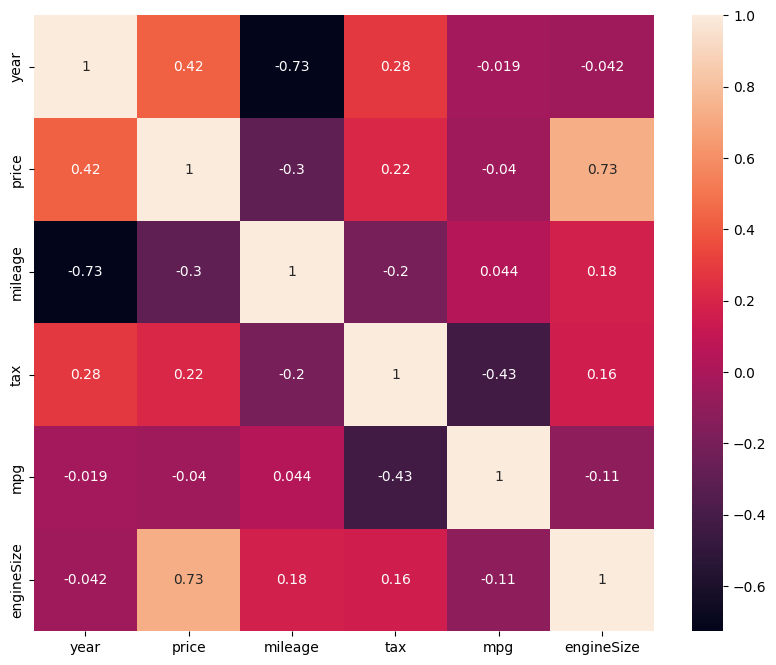

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik dari df
numeric_df = df.select_dtypes(include=['number'])

# Hitung korelasi dan buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# jika nilai atribut mendekati 1 maka korelari atribut semakin baik
# jika nilai atribut (- negatif) maka tdk memiliki korelasi sama sekali


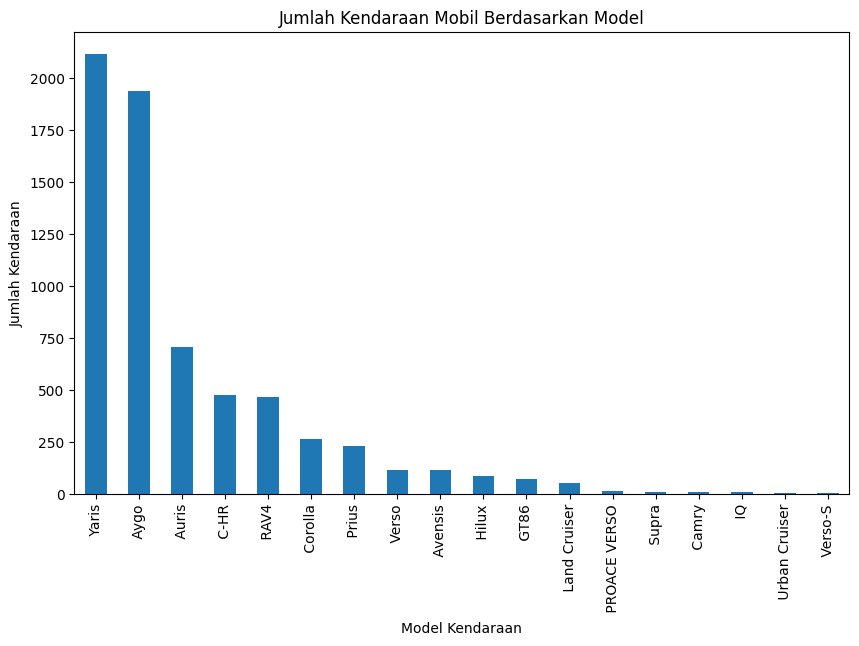

In [ ]:
# melihat jenis mobil yg terjual paling banyak dari data kita
jumlah_kendaraan = df['model'].value_counts()

plt.figure(figsize=(10, 6))
jumlah_kendaraan.plot(kind='bar')
plt.xlabel('Model Kendaraan')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan Mobil Berdasarkan Model')
plt.show()

<ipython-input-21-c563e8cfa976>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

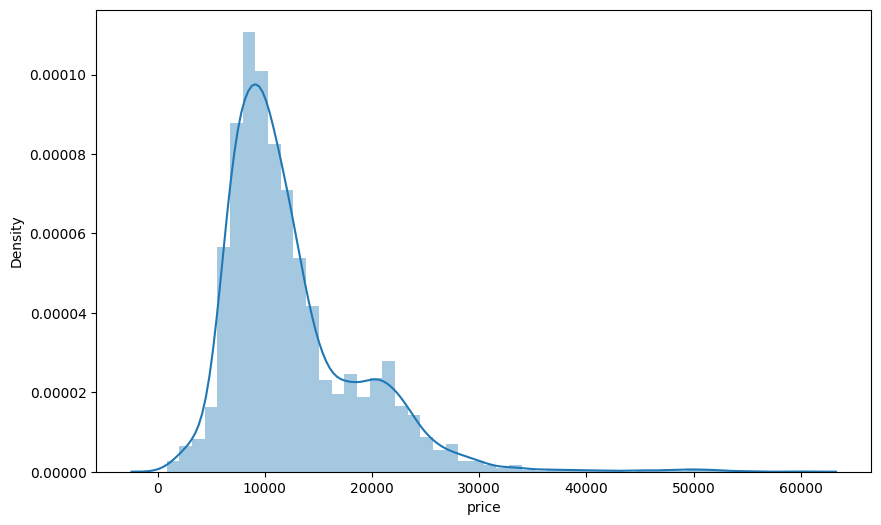

In [ ]:
# visualisasi harga mobil (euro)
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

In [ ]:
# konversi dari euro ke rupiah
nilai_tukar_euro_ke_rupiah = 16974

df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah

<ipython-input-22-713b4c9fa7bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
<ipython-input-22-713b4c9fa7bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah


In [ ]:
# cek 5 sample
df.sample(5)
# hasilnya sudah berupa rupiah

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5695,C-HR,2017,331722882,Automatic,27310,Hybrid,0,74.3,1.8
6014,C-HR,2019,402266826,Automatic,6354,Hybrid,2376360,74.3,1.8
4377,Aygo,2019,174662460,Manual,6942,Petrol,2546100,56.5,1.0
5528,Aygo,2017,145619946,Automatic,6433,Other,2461230,67.0,1.0
1734,Yaris,2019,203552208,Manual,5395,Petrol,2461230,47.9,1.5


# **4. Label Encoder = utk mengubah nilai objek menjadi angka**

In [ ]:
df.info()
# ada 3 atribut type datanya object
# harus kita ubah dulu menjadi type data int

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ubah 3 atribut m = model
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

# proses fit
df['model'] = m_encoder.fit_transform(df['model'])
df['transmission'] = t_encoder.fit_transform(df['transmission'])
df['fuelType'] = f_encoder.fit_transform(df['fuelType'])

<ipython-input-25-6d19cd0437c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = m_encoder.fit_transform(df['model'])
<ipython-input-25-6d19cd0437c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = t_encoder.fit_transform(df['transmission'])
<ipython-input-25-6d19cd0437c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [6]:
df.sample(5)
# hasilnya atribut m, t, f = sudah menjadi angka

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4044,Aygo,2019,8795,Manual,3000,Petrol,145,56.5,1.0
2027,Yaris,2017,12995,Automatic,8748,Hybrid,135,76.3,1.5
4274,Aygo,2018,8495,Manual,19558,Petrol,145,56.5,1.0
2220,Yaris,2016,11000,Automatic,25750,Hybrid,0,86.0,1.5
5701,C-HR,2017,16495,Automatic,30024,Hybrid,135,74.3,1.8


# **5. Preparation Data**

In [10]:
# Sebelum membagi menjadi set pelatihan dan pengujian, pastikan semua fitur numerik:
for feature in features:
    if df[feature].dtype == 'object':  # Periksa apakah fitur bertipe 'object' (string)
        df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0).astype(int)
        print(f"Mengubah '{feature}' ke numerik.")

Mengubah 'model' ke numerik.
Mengubah 'transmission' ke numerik.
Mengubah 'fuelType' ke numerik.


In [11]:
# utk memisahkan data train (x) & data testing (y)
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 8), (6738,))

In [13]:
# spliting data train & data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.shape
# hasilnya keluar 1348 brs data yg akan dilakukan testing

(1348,)

# **6. Training & Evaluation Data**

In [14]:
# Algoritma LinierRegression/Linier Berganda
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [15]:
# cek akurasi data
score = lr.score(x_test, y_test)
print("Akurasi model Regresi Linear Berganda adalah", score)

Akurasi model Regresi Linear Berganda adalah 0.7658935417346276


In [16]:
# Evaluasi Data
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2254.413998121708
MSE: 9962697.145777818
RMSE: 3156.374050358705


# **7. Testing**

In [18]:
from sklearn.preprocessing import LabelEncoder
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

In [5]:
# Sample Data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'toyota.csv' is in the same directory as your notebook
df = pd.read_csv('toyota.csv')  # Load or reload your original DataFrame

input_data = {
    'model': 'Yaris',
    'transmission': 'Automatic',
    'fuelType': 'Petrol',
    'year': 2019,
    'mileage': 1401,
    'tax' : 2385180,
    'mpg' : 76.3,
    'engineSize' : 1.5
}

input_df = pd.DataFrame([input_data])

# Inisialisasi dan fit LabelEncoders (menggunakan data dari DataFrame asli 'df')
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

# Dengan asumsi 'df' adalah DataFrame asli yang digunakan untuk pelatihan
m_encoder.fit(df['model'])  # Fit dengan data pelatihan
t_encoder.fit(df['transmission'])  # Fit dengan data pelatihan
f_encoder.fit(df['fuelType'])  # Fit dengan data pelatihan

input_df['model'] = m_encoder.transform(input_df['model'])
input_df['transmission'] = t_encoder.transform(input_df['transmission'])
input_df['fuelType'] = f_encoder.transform(input_df['fuelType'])

input_df

FileNotFoundError: [Errno 2] No such file or directory: 'toyota.csv'